In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Euro_6_latest.csv', delimiter = ',', encoding='ISO-8859-1')

## Data Preprocessing is done as in the report

In [4]:
# Remove a column called Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove features with more than 70% missing values
limitPer = len(df) * .70
df = df.dropna(thresh=limitPer, axis=1).copy()# drop unnecessary columns
df = df.drop(['Transmission','Euro Standard','Testing Scheme','Date of change','WLTP Imperial Low',
               'WLTP Imperial Medium','WLTP Imperial High','WLTP Imperial Extra High',
               'WLTP Imperial Combined','WLTP Imperial Combined (Weighted)' ,
                'Diesel VED Supplement','Emissions NOx [mg/km]',
               'THC Emissions [mg/km]','Noise Level dB(A)'], axis=1).copy()

In [5]:
AUTOMATIC = "Automatic"
MANUAL = "Manual"
ELECTRIC = "Electric"
df.loc[df['Manual or Automatic'].str.startswith('A'),'Transmission'] = AUTOMATIC
df.loc[df['Manual or Automatic'].str.startswith('M'),'Transmission'] = MANUAL
df.loc[df['Manual or Automatic'].str.startswith('E'),'Transmission'] = ELECTRIC

In [6]:
petrol = ['Petrol','Petrol / LPG']
diesel = ['Diesel']
electric = ['Electricity']
hybrid = ['Electricity / Petrol','Petrol Electric','Diesel Electric','Electricity / Diesel']
#df = df.copy()
df.loc[df['Fuel Type'].isin(petrol), 'Fuel'] = 'Petrol'
df.loc[df['Fuel Type'].isin(diesel), 'Fuel'] = 'Diesel'
df.loc[df['Fuel Type'].isin(electric), 'Fuel'] = 'Electric'
df.loc[df['Fuel Type'].isin(hybrid), 'Fuel'] = 'Hybrid'

In [7]:
ice = ['Internal Combustion Engine (ICE)']
hybrid = ['Plug-in Hybrid Electric Vehicle (PHEV)',
          'Mild Hybrid Electric Vehicle (MHEV)',
          'Hybrid Electric Vehicle (HEV)','Micro Hybrid']
ev = ['Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)']

df.loc[df['Powertrain'].isin(ice), 'PT'] = 'ICE'
df.loc[df['Powertrain'].isin(ev), 'PT'] = 'EV'
df.loc[df['Powertrain'].isin(hybrid), 'PT'] = 'Hybrid'

In [8]:
# Drop the old columns
df = df.drop(['Powertrain','Fuel Type','Manual or Automatic'], axis=1)
df.rename(columns={'PT':'Powertrain'}, inplace=True)

In [9]:
df['Engine Capacity'] = df['Engine Capacity'].fillna(0)

In [10]:
df['Engine Power (PS)'] = df.groupby(['Manufacturer','Model'], sort=False) \
    ['Engine Power (PS)'].apply(lambda x: x.ffill().bfill())

# Same with Engine Power (Kw)
df['Engine Power (Kw)'] = df.groupby(['Manufacturer','Model'], sort=False) \
    ['Engine Power (Kw)'].apply(lambda x: x.ffill().bfill())

In [11]:
df = df.drop(['WLTP Metric Combined (Weighted)','WLTP CO2 Weighted'], axis=1).copy()

In [12]:
df['WLTP Metric Combined'].fillna((df['WLTP Metric Combined'].mean()), inplace=True)
df['WLTP Metric Low'].fillna((df['WLTP Metric Low'].mean()), inplace=True)
df['WLTP Metric Medium'].fillna((df['WLTP Metric Medium'].mean()), inplace=True)
df['WLTP Metric High'].fillna((df['WLTP Metric High'].mean()), inplace=True)
df['WLTP Metric Extra High'].fillna((df['WLTP Metric Extra High'].mean()), inplace=True)
df['WLTP CO2'].fillna((df['WLTP CO2'].mean()), inplace=True)
df['Emissions CO [mg/km]'].fillna((df['Emissions CO [mg/km]'].mean()), inplace=True)
df.isnull().sum(axis = 0)

Manufacturer                0
Model                       0
Description                 0
Engine Capacity             0
Engine Power (PS)         177
Engine Power (Kw)          89
WLTP Metric Low             0
WLTP Metric Medium          0
WLTP Metric High            0
WLTP Metric Extra High      0
WLTP Metric Combined        0
WLTP CO2                    0
Emissions CO [mg/km]        0
Transmission                0
Fuel                        0
Powertrain                  0
dtype: int64

In [13]:
df = df.dropna().copy()

### Additional simple statistical analysis 

In [14]:
df.corr()

,Engine Capacity,Engine Power (PS),Engine Power (Kw),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP CO2,Emissions CO [mg/km]
Engine Capacity,1.000000,0.774230,0.757315,0.646861,0.399634,0.315369,0.379813,0.413805,0.742957,-0.109571
Engine Power (PS),0.774230,1.000000,0.960986,0.575433,0.339775,0.251194,0.272663,0.335780,0.565200,0.029086
Engine Power (Kw),0.757315,0.960986,1.000000,0.578785,0.335136,0.243554,0.257499,0.326848,0.556512,0.030707
WLTP Metric Low,0.646861,0.575433,0.578785,1.000000,0.825314,0.829728,0.850635,0.896543,0.775881,0.156310
WLTP Metric Medium,0.399634,0.339775,0.335136,0.825314,1.000000,0.878931,0.865129,0.888418,0.511176,0.126220
WLTP Metric High,0.315369,0.251194,0.243554,0.829728,0.878931,1.000000,0.974594,0.984246,0.441096,0.112127
WLTP Metric Extra High,0.379813,0.272663,0.257499,0.850635,0.865129,0.974594,1.000000,0.981181,0.557144,0.118176
WLTP Metric Combined,0.413805,0.335780,0.326848,0.896543,0.888418,0.984246,0.981181,1.000000,0.563379,0.127395
WLTP CO2,0.742957,0.565200,0.556512,0.775881,0.511176,0.441096,0.557144,0.563379,1.000000,0.061285
Emissions CO [mg/km],-0.109571,0.029086,0.030707,0.156310,0.126220,0.112127,0.118176,0.127395,0.061285,1.000000


By checking the correlation, it shows that emissions CO does not have high correlation into other data. This fullfil the Naive Bayes assumption that the attributes are independent from each other. Now, we are going to check the emissions CO data's value because we would like to it from continuous into discrete number by classified it.

In [15]:
df.describe().transpose()[['mean', 'std']]

,mean,std
Engine Capacity,1744.287665,894.872988
Engine Power (PS),175.893217,109.439872
Engine Power (Kw),131.782628,83.890608
WLTP Metric Low,8.307146,4.909390
WLTP Metric Medium,6.399704,4.837777
WLTP Metric High,5.861178,4.419764
WLTP Metric Extra High,7.056735,3.763594
WLTP Metric Combined,6.737001,4.058259
WLTP CO2,151.679009,57.911991
Emissions CO [mg/km],232.946411,197.198821


In [16]:
df[df['Emissions CO [mg/km]']==df['Emissions CO [mg/km]'].max()]

,Manufacturer,Model,Description,Engine Capacity,Engine Power (PS),Engine Power (Kw),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP CO2,Emissions CO [mg/km],Transmission,Fuel,Powertrain
3332,RENAULT,Clio,Iconic SCe 75,999.0,72.0,53.0,6.7,5.0,4.7,5.8,5.4,121.0,927.0,Manual,Petrol,ICE
3333,RENAULT,Clio,Iconic SCe 75,999.0,72.0,53.0,6.7,5.1,4.8,5.8,5.4,122.0,927.0,Manual,Petrol,ICE
3334,RENAULT,Clio,Iconic SCe 75 with BOSE,999.0,72.0,53.0,6.7,5.0,4.7,5.8,5.4,121.0,927.0,Manual,Petrol,ICE
3335,RENAULT,Clio,Iconic SCe 75 with BOSE,999.0,72.0,53.0,6.7,5.1,4.8,5.8,5.5,122.0,927.0,Manual,Petrol,ICE
3382,RENAULT,Clio,Play SCe 75,999.0,72.0,53.0,6.7,5.0,4.7,5.8,5.4,121.0,927.0,Manual,Petrol,ICE
3383,RENAULT,Clio,Play SCe 75,999.0,72.0,53.0,6.7,5.1,4.7,5.8,5.4,122.0,927.0,Manual,Petrol,ICE


In [17]:
df[df['Emissions CO [mg/km]']==df['Emissions CO [mg/km]'].min()]

,Manufacturer,Model,Description,Engine Capacity,Engine Power (PS),Engine Power (Kw),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP CO2,Emissions CO [mg/km],Transmission,Fuel,Powertrain
256,CITROEN,New C4,100kW Electric Vehicle with 50kWh battery,0.0,136.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Automatic,Electric,EV
257,CITROEN,New C4,100kW Electric Vehicle with 50kWh battery,0.0,136.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Automatic,Electric,EV
270,CITROEN,SpaceTourer,50KWh Electric Vehicle,0.0,136.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Automatic,Electric,EV
271,CITROEN,SpaceTourer,50KWh Electric Vehicle,0.0,136.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Automatic,Electric,EV
704,DS,DS 3 CROSSBACK,E-TENSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Automatic,Electric,EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,TESLA,Model 3,Performance (E5D#Gp),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Electric,Electric,EV
4246,TESLA,Model S,Long Range (SA3EB),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Electric,Electric,EV
4247,TESLA,Model S,Performance (SA3EP),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Electric,Electric,EV
4248,TESLA,Model X,Long Range (XA3EB),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Electric,Electric,EV


In [18]:
df['Emissions CO [mg/km]'].value_counts()

0.000000      283
233.791603     93
96.000000      91
71.000000      76
88.000000      73
             ... 
159.000000      1
360.000000      1
255.000000      1
491.000000      1
38.000000       1
Name: Emissions CO [mg/km], Length: 422, dtype: int64

<AxesSubplot:>

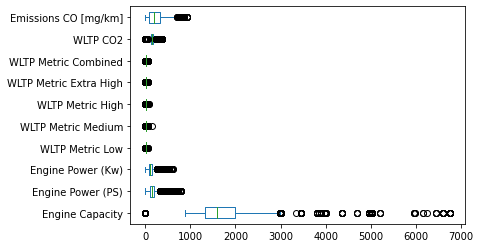

In [19]:
plt.rcParams["figure.figsize"] = (25,10)
df.plot.box(vert=False)

The analysis above are several consideration to split the data. The maximum emissions CO is 927 mg/km while minimum is 0. The data distribution is not well spread as the median is more in the left, leaving several threshold on the left. The mean of the data is 232.946411.

### Converting the Emissions CO data into Discrete Number

Here we will classify the amount of emissions CO into zero to low emissions and high emissions.

In [20]:
df['Emissions CO Class'] = pd.qcut(df['Emissions CO [mg/km]'], 2, labels=['zero to low', 'high'])

In [21]:
df['Emissions CO Class'].value_counts()

zero to low    2237
high           2230
Name: Emissions CO Class, dtype: int64

The data is well separated with almost same number. Next, we will start to do the Naive Bayes methods.

## Naive bayes method

This method is originally comes from Bayes' Theorem. It is naive, because it assumes that all of the attributes are independent from each other. By calculating the conditional probabilities, there will be a likelihood probability, prior probability and evidence as considerations to predict the probability of something happens. The equation is shown as below:

$$P(C_{k}|x)=\frac{P(C_{k})*P(x|C_{k})}{P(x)}$$

where $P(C_{k}|x)$ is the posterior probability, followed by likelihood and prior probability as enumerator and evidence probability as denominator.

In our case, we will determine how well the method to predict each class of Emissions CO. Because the data is in continuous number, we will convert it as discrete number. We classify the data into 'zero to low'and 'high' emissions. It is followed by cross-validation to avoid over-fitting.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import math

In [23]:
df['High CO Emission']=df['Emissions CO Class'].apply(lambda x: 1 if x=='high' else 0)

In [24]:
df['Emissions CO Class'].value_counts()

zero to low    2237
high           2230
Name: Emissions CO Class, dtype: int64

In [25]:
df.iloc[:,12:]

,Emissions CO [mg/km],Transmission,Fuel,Powertrain,Emissions CO Class,High CO Emission
0,760.0,Manual,Petrol,ICE,high,1
1,760.0,Manual,Petrol,ICE,high,1
2,760.0,Manual,Petrol,ICE,high,1
3,760.0,Manual,Petrol,ICE,high,1
4,829.0,Manual,Petrol,ICE,high,1
...,...,...,...,...,...,...
4652,423.0,Automatic,Hybrid,Hybrid,high,1
4653,423.0,Automatic,Hybrid,Hybrid,high,1
4654,706.0,Automatic,Hybrid,Hybrid,high,1
4655,706.0,Automatic,Hybrid,Hybrid,high,1


#### Gaussian Naive Bayes

It assumes that every countinuous values are distributed into a normal(Gaussian) distribution. 

In [26]:
df['Fuel'].value_counts()

Petrol      2307
Diesel      1068
Hybrid       948
Electric     144
Name: Fuel, dtype: int64

In [27]:
df['Fuel Class']=df['Fuel'].apply(lambda x: 1 if x=='Petrol' else 
                                       0 if x=='Diesel' or 'Hybrid' else -1)

In [28]:
X = df[['Fuel Class', 'WLTP CO2']]
y = df['High CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       455
           1       0.70      0.76      0.73       439

    accuracy                           0.72       894
   macro avg       0.72      0.72      0.72       894
weighted avg       0.72      0.72      0.72       894



In [30]:
model.score(X_test, y_test)

0.7192393736017897

In [50]:
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

Cross validation score:  [0.84675615 0.69798658 0.64277716 0.71444569 0.69764838]


#### Categorical Naive Bayes

In [32]:
X = df[['Transmission', 'Powertrain']]
y = df['High CO Emission'].values

enc = OrdinalEncoder()
X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = CategoricalNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       455
           1       0.62      0.48      0.54       439

    accuracy                           0.60       894
   macro avg       0.61      0.60      0.59       894
weighted avg       0.61      0.60      0.60       894



In [33]:
print('Accuracy score: ', clf.score(X_test, y_test))

Accuracy score:  0.6017897091722595


In [49]:
print('Cross validation score: ', cross_val_score(CategoricalNB(), X, y, cv = 5))

Cross validation score:  [0.86017897 0.69798658 0.64277716 0.66965286 0.68085106]


#### Mixed Naive Bayes

Here we will combine between the continuous attributes and categorical attributes. 

In [48]:
df['WLTPCO2_qt'] = pd.qcut(df['WLTP CO2'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])

X = df[['Transmission', 'Powertrain', 'Fuel Class', 'WLTPCO2_qt']]
y = df['High CO Emission']

enc = OrdinalEncoder()
X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = CategoricalNB()
clf = model.fit(X_train, y_train)

label = model.predict(X_test)

print(classification_report(y_test, label))
print('Accuracy score: ', clf.score(X_test, y_test))
print('Cross validation score: ', cross_val_score(CategoricalNB(), X, y, cv = 5))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       455
           1       0.70      0.76      0.73       439

    accuracy                           0.72       894
   macro avg       0.72      0.72      0.72       894
weighted avg       0.72      0.72      0.72       894

Accuracy score:  0.7192393736017897
Cross validation score:  [0.86017897 0.69798658 0.64277716 0.66965286 0.68085106]


Here we will combine the model fitting of each Gaussian and Categorical. The new probaility of each model is combined and to be used into the further fit modelling.

In [51]:
XG = df[['Fuel Class', 'WLTP CO2']]
XC = df[['Transmission', 'Powertrain']]

enc = OrdinalEncoder()
XC = enc.fit_transform(XC)

X=np.c_[XG, XC[:,0].ravel(), XC[:,1].ravel()]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


# Model Fitting
# Gaussian model
mG = GaussianNB()
fitG = mG.fit(Xtrain[:,0:2], ytrain)
# Categorical model
mC = CategoricalNB()
fitC = mC.fit(Xtrain[:,2:4], ytrain)


# Probability each train and test dataset
# On training data
G_train_probas = mG.predict_proba(Xtrain[:,0:2])
C_train_probas = mC.predict_proba(Xtrain[:,2:4])
# And on testing data
G_test_probas = mG.predict_proba(Xtest[:,0:2])
C_test_probas = mC.predict_proba(Xtest[:,2:4])

# New combination probability
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test


# Fit the model
mG = GaussianNB()
fitG = mG.fit(X_new_train, y_train)

# Predict class labels on a test data
lpred = mG.predict(X_new_test)


print('Classes: ', fitG.classes_) # class labels known to the classifier
print('Class Priors: ', fitG.class_prior_) # probability of each class.
# Use score method to get accuracy of model
print('--------------------------------------------------------')
score = mG.score(X_new_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels))

Classes:  [0 1]
Class Priors:  [0.49874055 0.50125945]
--------------------------------------------------------
Accuracy Score:  0.7315436241610739
Cross validation score:  [0.85011186 0.70693512 0.66741321 0.71444569 0.69764838]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.90      0.69       455
           1       0.73      0.28      0.41       439

    accuracy                           0.60       894
   macro avg       0.64      0.59      0.55       894
weighted avg       0.64      0.60      0.55       894



From the combination above, the highest accuracy score is obtained in the last method which is combination between Gaussian and Categorical NB. This model is categorized as good model with accuracy higher than 70%, the accuracy is 73.15%.

To improve the accuracy, we try to vary the emission CO into three label as below.

### Three Class labels for Emission CO

In [37]:
df['Emissions CO 3Class'] = pd.qcut(df['Emissions CO [mg/km]'], 3, labels=['low', 'medium', 'high'])
df['Emissions CO 3Class'].value_counts()

low       1511
high      1481
medium    1475
Name: Emissions CO 3Class, dtype: int64

In [38]:
df['CO Emission']=df['Emissions CO 3Class'].apply(lambda x: 1 if x=='high' else 
                                       0 if x=='medium' else -1)

In [52]:
# Gaussian

X = df[['Fuel Class', 'WLTP CO2']]
y = df['CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

          -1       0.57      0.70      0.63       305
           0       0.53      0.07      0.12       283
           1       0.51      0.81      0.63       306

    accuracy                           0.54       894
   macro avg       0.54      0.53      0.46       894
weighted avg       0.54      0.54      0.47       894

Accuracy Score:  0.5391498881431768
Cross validation score:  [0.63087248 0.43400447 0.52295633 0.54647256 0.43337066]


In [53]:
X = df[['Transmission', 'Powertrain']]
y = df['CO Emission'].values

enc = OrdinalEncoder()
X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = CategoricalNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

          -1       0.47      0.59      0.52       305
           0       0.52      0.39      0.45       283
           1       0.45      0.44      0.45       306

    accuracy                           0.48       894
   macro avg       0.48      0.47      0.47       894
weighted avg       0.48      0.48      0.47       894

Accuracy Score:  0.47651006711409394
Cross validation score:  [0.43512304 0.61409396 0.46136618 0.22844345 0.52631579]


By using three classes prediction, the accuracy decrease almost 30%. Therefore, we try to use other attributes to predict Emissions CO.

### Improving the Accuracy by trying the other attributes

In [41]:
df.columns

Index(['Manufacturer', 'Model', 'Description', 'Engine Capacity',
       'Engine Power (PS)', 'Engine Power (Kw)', 'WLTP Metric Low',
       'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High',
       'WLTP Metric Combined', 'WLTP CO2', 'Emissions CO [mg/km]',
       'Transmission', 'Fuel', 'Powertrain', 'Emissions CO Class',
       'High CO Emission', 'Fuel Class', 'WLTPCO2_qt', 'Emissions CO 3Class',
       'CO Emission'],
      dtype='object')

In [54]:
X = df[['Engine Power (PS)', 'WLTP CO2']]
y = df['High CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67       455
           1       0.65      0.24      0.35       439

    accuracy                           0.56       894
   macro avg       0.60      0.56      0.51       894
weighted avg       0.60      0.56      0.51       894

Accuracy Score:  0.5637583892617449
Cross validation score:  [0.50223714 0.51230425 0.58678611 0.54759239 0.537514  ]


In [55]:
X = df[['Engine Capacity', 'WLTP CO2']]
y = df['High CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       455
           1       0.78      0.47      0.59       439

    accuracy                           0.67       894
   macro avg       0.70      0.67      0.66       894
weighted avg       0.70      0.67      0.66       894

Accuracy Score:  0.6733780760626398
Cross validation score:  [0.56263982 0.58389262 0.537514   0.67077268 0.53639418]


In [56]:
X = df[['WLTP Metric Combined', 'WLTP CO2']]
y = df['High CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

           0       0.54      0.88      0.67       455
           1       0.64      0.22      0.32       439

    accuracy                           0.55       894
   macro avg       0.59      0.55      0.50       894
weighted avg       0.59      0.55      0.50       894

Accuracy Score:  0.5548098434004475
Cross validation score:  [0.47651007 0.53579418 0.61142217 0.53975364 0.49272116]


In [57]:
X = df[['Engine Power (Kw)', 'WLTP CO2']]
y = df['High CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67       455
           1       0.65      0.24      0.35       439

    accuracy                           0.56       894
   macro avg       0.60      0.56      0.51       894
weighted avg       0.60      0.56      0.52       894

Accuracy Score:  0.5637583892617449
Cross validation score:  [0.50223714 0.51342282 0.59238522 0.54759239 0.53863382]


In [58]:
X = df[['Engine Power (Kw)', 'Engine Capacity']]
y = df['High CO Emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB()
clf = model.fit(X_train, y_train)

pred_labels = model.predict(X_test)

print(classification_report(y_test, pred_labels))
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('Cross validation score: ', cross_val_score(GaussianNB(), X, y, cv = 5))

              precision    recall  f1-score   support

           0       0.56      0.90      0.69       455
           1       0.73      0.28      0.41       439

    accuracy                           0.60       894
   macro avg       0.64      0.59      0.55       894
weighted avg       0.64      0.60      0.55       894

Accuracy Score:  0.5950782997762863
Cross validation score:  [0.48993289 0.55033557 0.62933931 0.59462486 0.53079507]


The best attributes to be used are still the combination of Fuel, WLTP CO2, Transmission, and Powertrain. The other attributes does not improve the accuracy score.

The validation test for this method is done by using cross validation with the number of split to use is 5. This method basically is used for confirming whether the model can generalise over the dataset. From the obtained results (which is a list of scores per split), the best generalised model over the dataset is done by Categorical Naive Bayes.

### ROC Curve

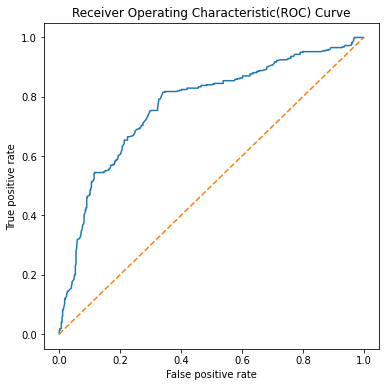

In [47]:
model = GaussianNB()
clf = model.fit(X_new_train, y_train)

ypredprobs = model.predict_proba(X_new_test)
probs = ypredprobs[:, 1]

fper, tper, threshold = roc_curve(ytest, probs)

plt.figure(figsize=(6, 6))
plt.plot(fper, tper)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.show()

This curve shows the performace of classification on the combination model between Gaussian and Categorical NB at all classification threshold. As the curve gets closer to the top-left corner, it indicates a good performance.

##### Model Evaluation

As a conclusion from Naive Bayes model, this method does not perform extremely good. It might because this method really depends on the each attributes probability, their correlation between each others and the predicted value, also the prior probability (relates to the relation between predicted and another attribute). From the cross validation score, Categorical Naive Bayes got the highest score. The evaluation of the model is shown as accuracy score. Overall, the highest accuracy score is 73.15%, which is obtained by combination naive bayes method between Gaussian Naive Bayes and Categorical Naive Bayes. 